In [1]:
using DataFrames
using DataFramesMeta
using CSV
using Plots

In [2]:
ht_dirs = filter(readdir()) do d
    startswith(d, "x") && endswith(d, "_ht")
end

lt_dirs = filter(readdir()) do d
    startswith(d, "x") && endswith(d, "_lt")
end

orig_dirs = "orig/" .* filter(readdir("orig")) do d
    startswith(d, "x")
end

40-element Vector{String}:
 "orig/x12_69_1_11792354917303778829"
 "orig/x14_18_1_9112664499129265742"
 "orig/x15_152_1_15226598875543807100"
 "orig/x15_37_1_17970095981904700399"
 "orig/x16_108_1_16463951128616827797"
 "orig/x16_79_1_8990999469714462386"
 "orig/x17_116_1_5194883718042313746"
 "orig/x17_141_1_7665379249726239355"
 "orig/x17_157_1_9408291996926218852"
 "orig/x17_163_1_12765083226518830676"
 "orig/x18_112_1_13432355422847779434"
 "orig/x18_192_1_9813029924933360301"
 "orig/x18_46_1_6343785286137708581"
 ⋮
 "orig/x22_52_1_10698313701712030011"
 "orig/x22_58_1_1770088000645106402"
 "orig/x22_5_1_3712727963374645111"
 "orig/x22_66_1_12944870852021997124"
 "orig/x22_77_1_10449231108334789391"
 "orig/x22_86_1_2522305505573387950"
 "orig/x22_97_1_2264868879956186844"
 "orig/x23_169_1_6507621420699838150"
 "orig/x23_195_1_3585204949086463465"
 "orig/x23_200_1_10412657832078408293"
 "orig/x3_14_1_4203565649922174115"
 "orig/x9_7_1_14854801169259365091"

In [3]:
ht_data = [CSV.read("$d/log.txt", delim="\t", ignorerepeated=true, DataFrame) for d in ht_dirs]
lt_data = [CSV.read("$d/log.txt", delim="\t", ignorerepeated=true, DataFrame) for d in lt_dirs]
orig_data = [CSV.read("$d/log.txt", delim="\t", ignorerepeated=true, DataFrame) for d in orig_dirs]

40-element Vector{DataFrame}:
 500×67 DataFrame
 Row │ mean_cap  var_cap  max_cap   min_cap   mean_n_loc  var_n_loc    max_n_l ⋯
     │ Float64   Float64  Float64   Float64   Float64     Float64      Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf ⋯
   2 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   3 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   4 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   5 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf ⋯
   6 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   7 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   8 │ NaN        NaN     -Inf      Inf          NaN      NaN             -Inf
   9 │ NaN        NaN     -Inf      Inf          NaN      NaN            

In [4]:
arr_ht = [df.n_arrived for df in ht_data]
arr_lt = [df.n_arrived for df in lt_data]
arr_orig = [df.n_arrived for df in orig_data];

In [5]:
deaths_ht = [df.n_dead for df in ht_data]
deaths_lt = [df.n_dead for df in lt_data]
deaths_orig = [df.n_dead for df in orig_data];

In [6]:
function mean_over_time(series)
    mn = Float64[]
    
    for t in eachindex(series[1])
        sm = 0.0
        for s in series
            sm += s[t]
        end
        push!(mn, sm/length(series))
    end
    
    mn
end

mean_over_time (generic function with 1 method)

In [7]:
motao = mean_over_time(arr_orig)
offs_arr = motao[100]/(motao[200]-motao[100])

motdo = mean_over_time(deaths_orig)
offs_deaths = motdo[100]/(motdo[200]-motdo[100])

0.1460554371002132

In [33]:
arr_real_cs = cumsum([181460, 119390, 24815, 14876])
real_offs_arr = arr_real_cs[1] * offs_arr
arr_real = [(i*100+100, el) for (i, el) in enumerate(arr_real_cs .+ real_offs_arr)]

deaths_real_cs = cumsum([4581, 2853, 1314, 1262])
real_offs_deaths = deaths_real_cs[1] * offs_deaths
deaths_real = [(i*100+100, el) for (i, el) in enumerate(deaths_real_cs .+ real_offs_deaths)]

years = [Plots.text(string(y)*"  ", 12, :right) for y in 2016:2019]

4-element Vector{Plots.PlotText}:
 Plots.PlotText("2016  ", Plots.Font("sans-serif", 12, :right, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0)))
 Plots.PlotText("2017  ", Plots.Font("sans-serif", 12, :right, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0)))
 Plots.PlotText("2018  ", Plots.Font("sans-serif", 12, :right, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0)))
 Plots.PlotText("2019  ", Plots.Font("sans-serif", 12, :right, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0)))

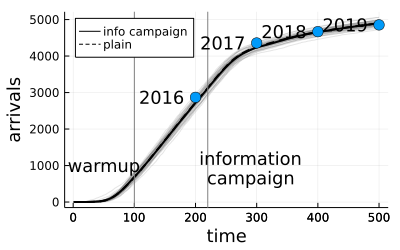

In [38]:
gr()

plot(arr_ht, linecolor=:grey, linealpha=0.2, label = "", xlabel="time", ylabel="arrivals")
plot!(mean_over_time(arr_ht), linecolor=:black, linewidth=2, label = "info campaign")
plot!(mean_over_time(arr_orig), linecolor=:black, linewidth=2, label="plain", legend=:topleft, linestyle=:dash)

vline!([220], line=:gray, label="")
annotate!(290, 1000, Plots.text("information\ncampaign", font(family="sans-serif", pointsize=12)))

vline!([100], line=:gray, label="")
annotate!(50, 1000, Plots.text("warmup", font(family="sans-serif", pointsize=12)))


plright = twinx()
plot!(plright, arr_real, seriestype=:scatter, markersize=6, label="", series_annotations = years,
    ylims=(0,430000), yshowaxis=false, yticks=false, size=(400, 250))



In [39]:
savefig("arrivals_orig_ic_med.pdf")

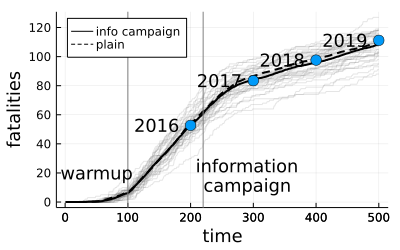

In [40]:
gr()

plot(deaths_ht, linecolor=:grey, linealpha=0.2, label = "", xlabel="time", ylabel="fatalities")
plot!(mean_over_time(deaths_ht), linecolor=:black, linewidth=2, label = "info campaign")
plot!(mean_over_time(deaths_orig), linecolor=:black, linewidth=2, label="plain", legend=:topleft, linestyle=:dash)

vline!([220], line=:gray, label="")
annotate!(290, 20, Plots.text("information\ncampaign", font(family="sans-serif", pointsize=12)))

vline!([100], line=:gray, label="")
annotate!(50, 20, Plots.text("warmup", font(family="sans-serif", pointsize=12)))


plright = twinx()
plot!(plright, deaths_real, seriestype=:scatter, markersize=6, label="", series_annotations = years,
    ylims=(0,12500), yshowaxis=false, yticks=false, size=(400, 250))



In [41]:
savefig("deaths_orig_ic_med.pdf")

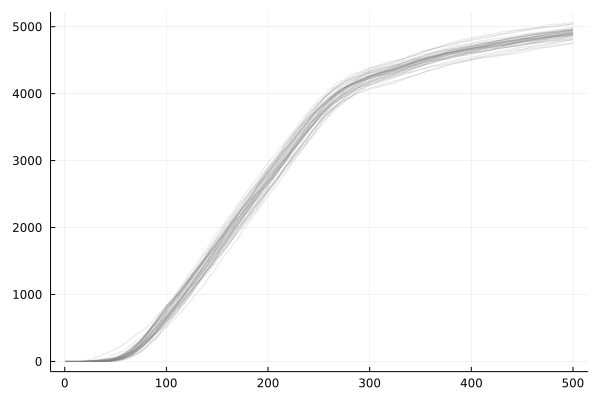

In [13]:
plot(arr_lt, linecolor=:grey, linealpha=0.2, label = "")

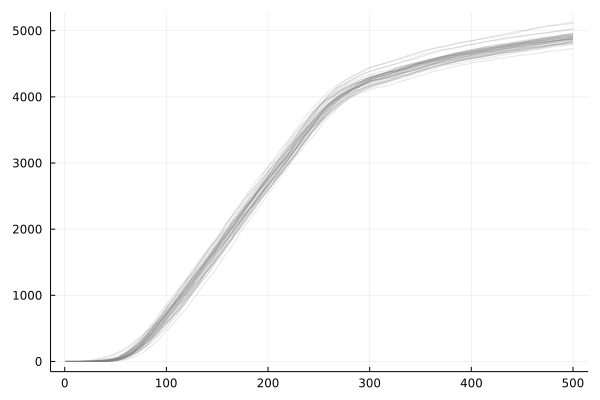

In [14]:
plot(arr_orig, linecolor=:grey, linealpha=0.2, label = "")

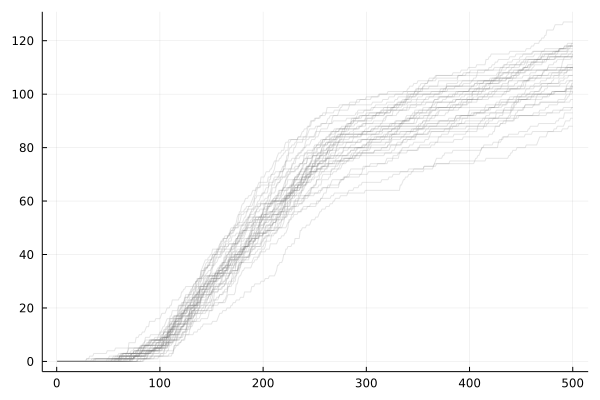

In [15]:
plot(deaths_ht, linecolor=:grey, linealpha=0.2, label = "")

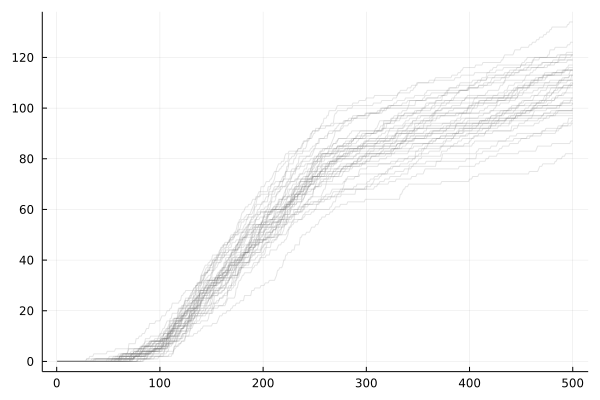

In [16]:
plot(deaths_lt, linecolor=:grey, linealpha=0.2, label = "")

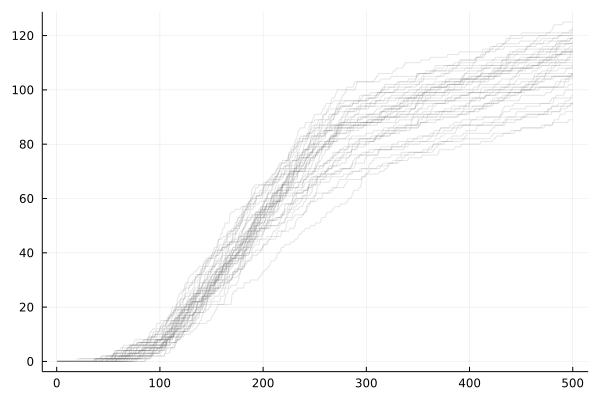

In [17]:
plot(deaths_orig, linecolor=:grey, linealpha=0.2, label = "")